# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 
## Kevon Cambridge

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [2]:
# Add any additional import statements you need here
import matplotlib as plt
import nltk
from nltk.stem import WordNetLemmatizer

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "C:/Users/19545/ADS509 Text Mining/ADS-509-Module-2"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [4]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    
    if num_tokens > 0:
        lexical_diversity = num_unique_tokens/num_tokens
    else:
        return 'num_tokens is 0'
    num_characters = len(''.join(tokens))
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        print(Counter(tokens).most_common(5))
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [5]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
[('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1)]


Q: Why is it beneficial to use assertion statements in your code? 

A: It is beneficial to use assertion statements in our code because it helps us to see if an assuption is true before continuing with your code.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [6]:
path = 'C:/Users/19545/ADS509 Text Mining/ADS-509-Module-2/lyrics'
print(os.listdir(path))

['cher', 'robyn']


In [7]:
#Read in the lyrics data
artists = []
title = []
lyrics = []

lyrics_data = {}

for artist in os.listdir(path):
    artist_name = os.path.join(path, artist)
    for file in os.listdir(artist_name):
        filename = os.path.join(path, artist, file)
        with open(filename) as infile:
            songs = infile.readlines()
        artists.append(artist)
        title.append(songs[0])
        lyrics.append(''.join(songs))
        
        #f1 = open(filename, 'r')
        #songs = file.replace('.txt', '').split('\n')
        #print(songs[0])

lyrics_data = {'Name': artists, 'Title': title, 'Lyrics': lyrics}
#lyrics_data
df_lyrics = pd.DataFrame(lyrics_data)
df_lyrics

,Name,Title,Lyrics
0,cher,"""88 Degrees""\n","""88 Degrees""\n\n\n\nStuck in L.A., ain't got n..."
1,cher,"""A Different Kind Of Love Song""\n","""A Different Kind Of Love Song""\n\n\n\nWhat if..."
2,cher,"""After All""\n","""After All""\n\n\n\nWell, here we are again\nI ..."
3,cher,"""Again""\n","""Again""\n\n\n\nAgain evening finds me at your ..."
4,cher,"""Alfie""\n","""Alfie""\n\n\n\nWhat's it all about, Alfie?\nIs..."
...,...,...,...
415,robyn,"""We Dance To The Beat""\n","""We Dance To The Beat""\n\n\n\nWe dance to the ..."
416,robyn,"""Where Did Our Love Go""\n","""Where Did Our Love Go""\n\n\n\nThoughts about ..."
417,robyn,"""Who's That Girl""\n","""Who's That Girl""\n\n\n\nGood girls are pretty..."
418,robyn,"""With Every Heartbeat""\n","""With Every Heartbeat""\n\n\n\nMaybe we could m..."


In [8]:
cher_path = 'C:/Users/19545/ADS509 Text Mining/ADS-509-Module-2/twitter/cher_followers_data.txt'
robynkonichiwa_path = 'C:/Users/19545/ADS509 Text Mining/ADS-509-Module-2/twitter/robynkonichiwa_followers_data.txt'

In [9]:
# Read in the twitter data and adding to dataframe then joining both dataframe

#Reading Cher data
#col_names = ['screen_names', 'names', 'id', 'location', 'followers_count', 'friends_count', 'description']
cher_data = pd.read_csv(cher_path, sep = '\t',error_bad_lines = False)
cher_data['Artist_name'] = 'cher'
first_column = cher_data.pop('Artist_name')
cher_data.insert(0, 'Artist_name', first_column)

#Reading Robynkonichiwa data
robynkonichiwa_data = pd.read_csv(robynkonichiwa_path, sep = '\t', encoding = 'utf-8')
robynkonichiwa_data['Artist_name'] = 'robynkonichiwa'
first_column = robynkonichiwa_data.pop('Artist_name')
robynkonichiwa_data.insert(0, 'Artist_name', first_column)
robynkonichiwa_data.head()

C:\Users\19545\AppData\Local\Temp\ipykernel_15176\1627199286.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  cher_data = pd.read_csv(cher_path, sep = '\t',error_bad_lines = False)
b'Skipping line 624: expected 7 fields, saw 12\nSkipping line 17506: expected 7 fields, saw 12\nSkipping line 104621: expected 7 fields, saw 12\n'
b'Skipping line 188924: expected 7 fields, saw 12\n'
b'Skipping line 301600: expected 7 fields, saw 12\n'
b'Skipping line 429936: expected 7 fields, saw 12\nSkipping line 444405: expected 7 fields, saw 12\n'
b'Skipping line 677792: expected 7 fields, saw 12\nSkipping line 773482: expected 7 fields, saw 12\n'
b'Skipping line 818258: expected 7 fields, saw 12\nSkipping line 895225: expected 7 fields, saw 12\n'
b'Skipping line 955213: expected 7 fields, saw 10\nSkipping line 994827: expected 7 fields, saw 12\n'
b'Skipping line 1246039: expected 7 fields, saw 12\n'
b'Skip

,Artist_name,screen_name,name,id,location,followers_count,friends_count,description
0,robynkonichiwa,AngelxoArts,Angelxo,1424055675030806529,"Zacatlan, Puebla, Mexico",29,535,I love chill •Facebook / Instagram / SoundClou...
1,robynkonichiwa,songsfornikola,johnny,1502717352575651840,NaN,6,318,"books, movies, music, nature & TV shows. OG Sw..."
2,robynkonichiwa,thibaud_lola,Thibaud Lola,1502407708246478852,NaN,3,69,(Am)auteur en herbe 🌱 - juriste en paille 🤡 - ...
3,robynkonichiwa,KyleSew2112,Kyle S 🌹🇬🇧🇺🇦,3423966821,South East London,1258,3444,This Twitter profile is full of sarcasm and ra...
4,robynkonichiwa,MusiFlo,MusiFlo,3324069364,Canada,470,1706,Flora Youssef - Blogger & Founder Posting revi...


In [10]:
#artist data
df_artist_data = pd.concat([cher_data, robynkonichiwa_data])
df_artist_data

,Artist_name,screen_name,name,id,location,followers_count,friends_count,description
0,cher,hsmcnp,Country Girl,3.515221e+07,NaN,1302.0,1014.0,NaN
1,cher,horrormomy,Jeny,7.421531e+17,Earth,81.0,514.0,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
2,cher,anju79990584,anju,1.496463e+18,NaN,13.0,140.0,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡
3,cher,gallionjenna,J,3.366480e+09,NaN,752.0,556.0,csu
4,cher,bcscomm,bcscomm,8.391504e+07,"Washington, DC",888.0,2891.0,Writer @Washinformer @SpelmanCollege alumna #D...
...,...,...,...,...,...,...,...,...
351834,robynkonichiwa,jakegiles,Jake Giles,1.972510e+07,LA,7690.0,2165.0,"singer of songs, type 1 diabetic, tired $jakel..."
351835,robynkonichiwa,axelbluhme,Axel Bluhme,1.957376e+07,DK,238.0,1565.0,Dadx2/ Con-Arch/ Photographer/ DK #stemgrønnes...
351836,robynkonichiwa,RayRayRay27,Rachael :),1.991922e+07,Oldham,762.0,1479.0,A year to change a life is still a year ✨😌
351837,robynkonichiwa,bhandberg,Ben Handberg,1.264246e+07,Sydney,432.0,593.0,Head of Consumer - Mango. Made in Melbourne. R...


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [11]:
punctuation = set(punctuation) # speeds up comparison

In [12]:
#Function to remove punctuation
def remove_punctuation(text):
    punctuationfree = ''.join([i for i in text if i not in punctuation])
    return punctuationfree

#defining function for tokenization
def tokenization(text):
    return text.split()

##defining function for stop removal
def remove_stopwords(text):
    output = [i for i in text if i not in sw]
    return output

In [13]:
#replace Na values with '' 
df_artist_data['description'] = df_artist_data['description'].replace(np.nan, '')

#storing the punctuation free text
df_artist_data['clean_desc'] = df_artist_data['description'].apply(lambda x:remove_punctuation(x))

#lowering the description
df_artist_data['clean_desc'] = df_artist_data['clean_desc'].apply(lambda x: x.lower())

#applying tokenized function to the column
df_artist_data['clean_desc'] = df_artist_data['clean_desc'].apply(lambda x: tokenization(x))

#applying stopword function
df_artist_data['clean_desc'] = df_artist_data['clean_desc'].apply(lambda x:remove_stopwords(x))
df_artist_data.head()

,Artist_name,screen_name,name,id,location,followers_count,friends_count,description,clean_desc
0,cher,hsmcnp,Country Girl,3.515221e+07,NaN,1302.0,1014.0,,[]
1,cher,horrormomy,Jeny,7.421531e+17,Earth,81.0,514.0,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,"[𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]"
2,cher,anju79990584,anju,1.496463e+18,NaN,13.0,140.0,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,"[163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓, フォローしてくれたらdmします🧡]"
3,cher,gallionjenna,J,3.366480e+09,NaN,752.0,556.0,csu,[csu]
4,cher,bcscomm,bcscomm,8.391504e+07,"Washington, DC",888.0,2891.0,Writer @Washinformer @SpelmanCollege alumna #D...,"[writer, washinformer, spelmancollege, alumna,..."


In [14]:
# create your clean lyrics data here
#storing the punctuation free text
df_lyrics['clean_lyrics'] = df_lyrics['Lyrics'].apply(lambda x:remove_punctuation(x))

#lowering the description
df_lyrics['clean_lyrics'] = df_lyrics['clean_lyrics'].apply(lambda x: x.lower())

#applying tokenized function to the column
df_lyrics['clean_lyrics'] = df_lyrics['clean_lyrics'].apply(lambda x: tokenization(x))

#applying stopword function
df_lyrics['clean_lyrics'] = df_lyrics['clean_lyrics'].apply(lambda x:remove_stopwords(x))
df_lyrics.tail()

,Name,Title,Lyrics,clean_lyrics
415,robyn,"""We Dance To The Beat""\n","""We Dance To The Beat""\n\n\n\nWe dance to the ...","[dance, beat, dance, beat, dance, beat, dance,..."
416,robyn,"""Where Did Our Love Go""\n","""Where Did Our Love Go""\n\n\n\nThoughts about ...","[love, go, thoughts, thinkin, used, love, stro..."
417,robyn,"""Who's That Girl""\n","""Who's That Girl""\n\n\n\nGood girls are pretty...","[whos, girl, good, girls, pretty, like, time, ..."
418,robyn,"""With Every Heartbeat""\n","""With Every Heartbeat""\n\n\n\nMaybe we could m...","[every, heartbeat, maybe, could, make, right, ..."
419,robyn,"""You've Got That Something""\n","""You've Got That Something""\n\n\n\nLook at me ...","[youve, got, something, look, im, givin, lovin..."


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [15]:
# calls to descriptive_stats here

#getting cher data into a list
cher_desc = []
cher_lyrics = []
cher = df_artist_data[df_artist_data['Artist_name'] == 'cher']
cher_song = df_lyrics[df_lyrics['Name'] == 'cher']

for desc in cher['clean_desc']:
    cher_desc.extend(desc)

for lyric in cher_song['clean_lyrics']:
    cher_lyrics.extend(lyric)
    
#getting robynkonichiwa data into a list
robynkonichiwa_desc = []
robynkonichiwa_lyrics = []
robynkonichiwa = df_artist_data[df_artist_data['Artist_name'] == 'robynkonichiwa']
robynkonichiwa_song = df_lyrics[df_lyrics['Name'] == 'robyn']

for desc in robynkonichiwa['clean_desc']:
    robynkonichiwa_desc.extend(desc)
    
for lyric in robynkonichiwa_song['clean_lyrics']:
    robynkonichiwa_lyrics.extend(lyric)
    


print('Twitter:')
print('Descriptive Stats Cher')
descriptive_stats(cher_desc)

print('\n')

print('Descriptive Stats Robynkonichiwa')
descriptive_stats(robynkonichiwa_desc)

print('\n')

print('Lyrics')
print('Descriptive Stats Cher')
descriptive_stats(cher_lyrics)

print('\n')

print('Descriptive Stats Robynkonichiwa')
descriptive_stats(robynkonichiwa_lyrics)


Twitter:
Descriptive Stats Cher
There are 16148955 tokens in the data.
There are 1697994 unique tokens in the data.
There are 96043813 characters in the data.
The lexical diversity is 0.105 in the data.
[('love', 214529), ('im', 139037), ('life', 122900), ('music', 88168), ('de', 73277)]


Descriptive Stats Robynkonichiwa
There are 1538163 tokens in the data.
There are 271325 unique tokens in the data.
There are 9397180 characters in the data.
The lexical diversity is 0.176 in the data.
[('music', 15160), ('love', 11683), ('im', 9052), ('och', 7922), ('life', 7387)]


Lyrics
Descriptive Stats Cher
There are 35916 tokens in the data.
There are 3703 unique tokens in the data.
There are 172696 characters in the data.
The lexical diversity is 0.103 in the data.
[('love', 1004), ('im', 513), ('know', 486), ('dont', 440), ('youre', 333)]


Descriptive Stats Robynkonichiwa
There are 15227 tokens in the data.
There are 2156 unique tokens in the data.
There are 73988 characters in the data.
The

[15227, 2156, 0.14159059565245943, 73988]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: If we left stopwords in the top 5 words would either be stopwords such as (is, the, are etc..)

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: I do not listen to either artist but cher is a familiar name I've heard from friends and family. robynkonichiwa on the other hand is more unique, I have never heard of robynkonichiwa.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [16]:
def name_emoji(s):
    return(s in emoji.is_emoji('en'))

assert(emoji.is_emoji("❤️"))
#assert(not name_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [17]:
# Your code here
cher_spec = []
robynkonichiwa_spec = []

for desc in cher['clean_desc']:
    for word in desc:
        if emoji.is_emoji(word):
            cher_spec.append(word)
        else:
            None
cher_num_spec = Counter(cher_spec)
print('Ten Most Common Emojis For Cher')
print(cher_num_spec.most_common(10))

print('\n')

for desc in robynkonichiwa['clean_desc']:
    for word in desc:
        if emoji.is_emoji(word):
            robynkonichiwa_spec.append(word)
        else:
            None
robynkonichiwa_num_spec = Counter(cher_spec)
print('Ten Most Common Emojis For robynkonichiwa')
print(robynkonichiwa_num_spec.most_common(10))
        

Ten Most Common Emojis For Cher
[('❤️', 14731), ('🏳️\u200d🌈', 14195), ('♥', 10231), ('❤', 9682), ('✨', 8408), ('🌈', 5500), ('🇺🇸', 3737), ('💙', 3708), ('💜', 3509), ('🌊', 3303)]


Ten Most Common Emojis For robynkonichiwa
[('❤️', 14731), ('🏳️\u200d🌈', 14195), ('♥', 10231), ('❤', 9682), ('✨', 8408), ('🌈', 5500), ('🇺🇸', 3737), ('💙', 3708), ('💜', 3509), ('🌊', 3303)]


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [18]:
# Your code here
regexHash = re.compile(r'#[a-zA-Z]+')

#Cher's hashtags
cher_hashtag = []
for tag in cher['description'].astype(str):
    hashtag = re.findall(regexHash, tag)
    #cher_hashtag.append(hashtag)
    cher_hashtag.extend(hashtag)

cher_num_hashtag = Counter(cher_hashtag)
print('Ten Most Common Hashtags for Cher')
print(cher_num_hashtag.most_common(10))


#Robyn's hashtags
robynkonichiwa_hashtag = []
for tag in robynkonichiwa['description'].astype(str):
    hashtag = re.findall(regexHash, tag)
    robynkonichiwa_hashtag.extend(hashtag)

robynkonichiwa_num_hashtag = Counter(robynkonichiwa_hashtag)
print('Ten Most Common Hashtags for robynkonichiwa')
print(robynkonichiwa_num_hashtag.most_common(10))

Ten Most Common Hashtags for Cher
[('#BLM', 9536), ('#Resist', 6040), ('#BlackLivesMatter', 4675), ('#resist', 3798), ('#FBR', 3240), ('#TheResistance', 2995), ('#blacklivesmatter', 2645), ('#BidenHarris', 2640), ('#Resistance', 1915), ('#VoteBlue', 1877)]
Ten Most Common Hashtags for robynkonichiwa
[('#BlackLivesMatter', 337), ('#BLM', 307), ('#blacklivesmatter', 208), ('#music', 178), ('#Music', 114), ('#EDM', 86), ('#LGBTQ', 76), ('#TeamFollowBack', 59), ('#blm', 56), ('#travel', 51)]


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [19]:
#Cleaning title
#storing the punctuation free text
df_lyrics['clean_title'] = df_lyrics['Title'].apply(lambda x:remove_punctuation(x))

#lowering the description
df_lyrics['clean_title'] = df_lyrics['clean_title'].apply(lambda x: x.lower())

#applying tokenized function to the column
df_lyrics['clean_title'] = df_lyrics['clean_title'].apply(lambda x: tokenization(x))

#applying stopword function
df_lyrics['clean_title'] = df_lyrics['clean_title'].apply(lambda x:remove_stopwords(x))
df_lyrics.tail()

,Name,Title,Lyrics,clean_lyrics,clean_title
415,robyn,"""We Dance To The Beat""\n","""We Dance To The Beat""\n\n\n\nWe dance to the ...","[dance, beat, dance, beat, dance, beat, dance,...","[dance, beat]"
416,robyn,"""Where Did Our Love Go""\n","""Where Did Our Love Go""\n\n\n\nThoughts about ...","[love, go, thoughts, thinkin, used, love, stro...","[love, go]"
417,robyn,"""Who's That Girl""\n","""Who's That Girl""\n\n\n\nGood girls are pretty...","[whos, girl, good, girls, pretty, like, time, ...","[whos, girl]"
418,robyn,"""With Every Heartbeat""\n","""With Every Heartbeat""\n\n\n\nMaybe we could m...","[every, heartbeat, maybe, could, make, right, ...","[every, heartbeat]"
419,robyn,"""You've Got That Something""\n","""You've Got That Something""\n\n\n\nLook at me ...","[youve, got, something, look, im, givin, lovin...","[youve, got, something]"


In [20]:
#your code here
#getting cher data into a list
cher_titles = []
cher_song = df_lyrics[df_lyrics['Name'] == 'cher']

for title in cher_song['clean_title']:
    for word in title:
        cher_titles.append(word)
    
#getting robynkonichiwa data into a list
robynkonichiwa_titles = []
robynkonichiwa_song = df_lyrics[df_lyrics['Name'] == 'robyn']

for title in robynkonichiwa_song['clean_title']:
    for word in title:
        robynkonichiwa_titles.append(word)

print('Five Most Common Words in Song Titles for Cher')
print(Counter(cher_titles).most_common(5))

print('\n')

robynkonichiwa_titles = []
for title in df_lyrics['clean_title']:
    for word in title:
        robynkonichiwa_titles.append(word)

print('Five Most Common Words in Song Titles for Cher')
print(Counter(cher_titles).most_common(5))

Five Most Common Words in Song Titles for Cher
[('love', 38), ('man', 12), ('song', 11), ('dont', 10), ('come', 7)]


Five Most Common Words in Song Titles for Cher
[('love', 38), ('man', 12), ('song', 11), ('dont', 10), ('come', 7)]


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Cher              AxesSubplot(0.125,0.125;0.775x0.755)
robynkonichiwa    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

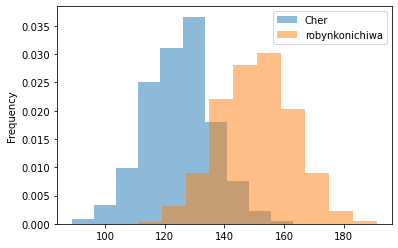

In [21]:
num_replicates = 1000


df = pd.DataFrame({
    "artist" : ['Cher'] * num_replicates + ['robynkonichiwa']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: \s is used for whitespace meaning (space, tabs, newline) and the + means 1 or more. So \s+ is saying whitespace where there is 1 or more.


In [22]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

### References:
#### For data retrieval:
https://www.youtube.com/watch?v=hhjn4HVEdy0 \n
#### For data cleaning:
https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/